# i. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

      > Nama      : Reyki Seprianza
      > Batch     : 009

## Assignment Objectives

*Graded Challenge 4* ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

### About Data

> This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

> Following is the Data Dictionary for Credit Card dataset :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# ii. Import Libraries
      > *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.
 

In [1]:

import numpy as np # 
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.cm as cm




from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score,silhouette_samples



import warnings
warnings.filterwarnings(action="ignore")

# iii. Data Loading
      > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
  

In [2]:
#definisi randomstate agar tidak berubah kemudian dan set display menampilkan seluruh kolom
np.random.seed(13)
random_state = 14
pd.set_option('display.max_columns', None)

In [3]:
df0= pd.read_csv('CC GENERAL.csv')
df = df0.copy()
print('Dataset ini memiliki ukuran',df.shape)
df.head()

Dataset ini memiliki ukuran (8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

#   iv. Exploratory Data Analysis (EDA)
      > Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [4]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Data yang kita miliki sekilas ada yang punya outlier


In [5]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

Data yang kita miliki mempunyai missing value terbesar pada MINIMUM_PAYMENTS

<AxesSubplot:>

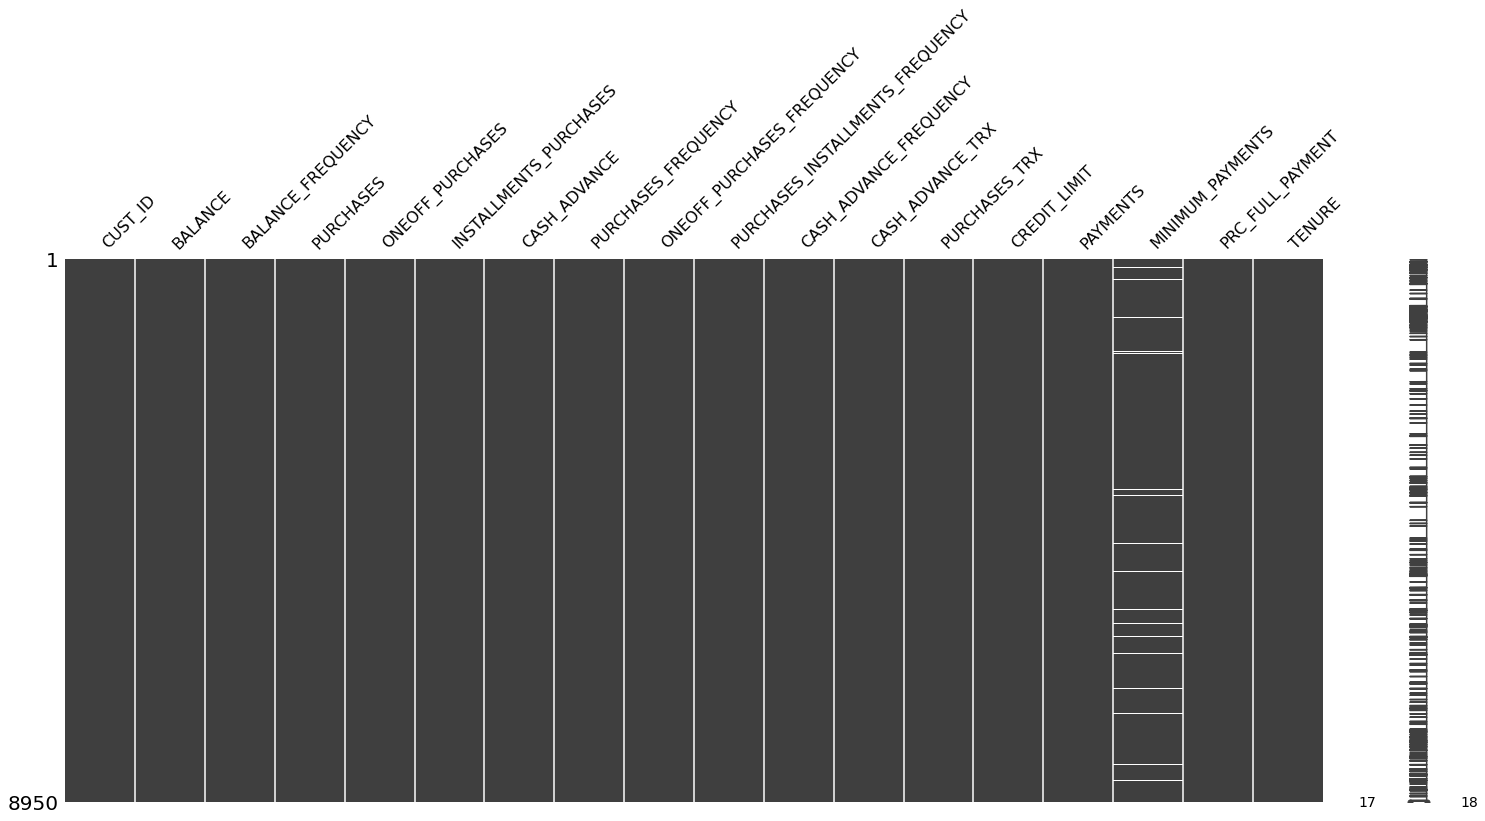

In [6]:
#Visualisasikan Missing value
msno.matrix(df)

Distribusi Missing Value yang ada pada dataset

<AxesSubplot:>

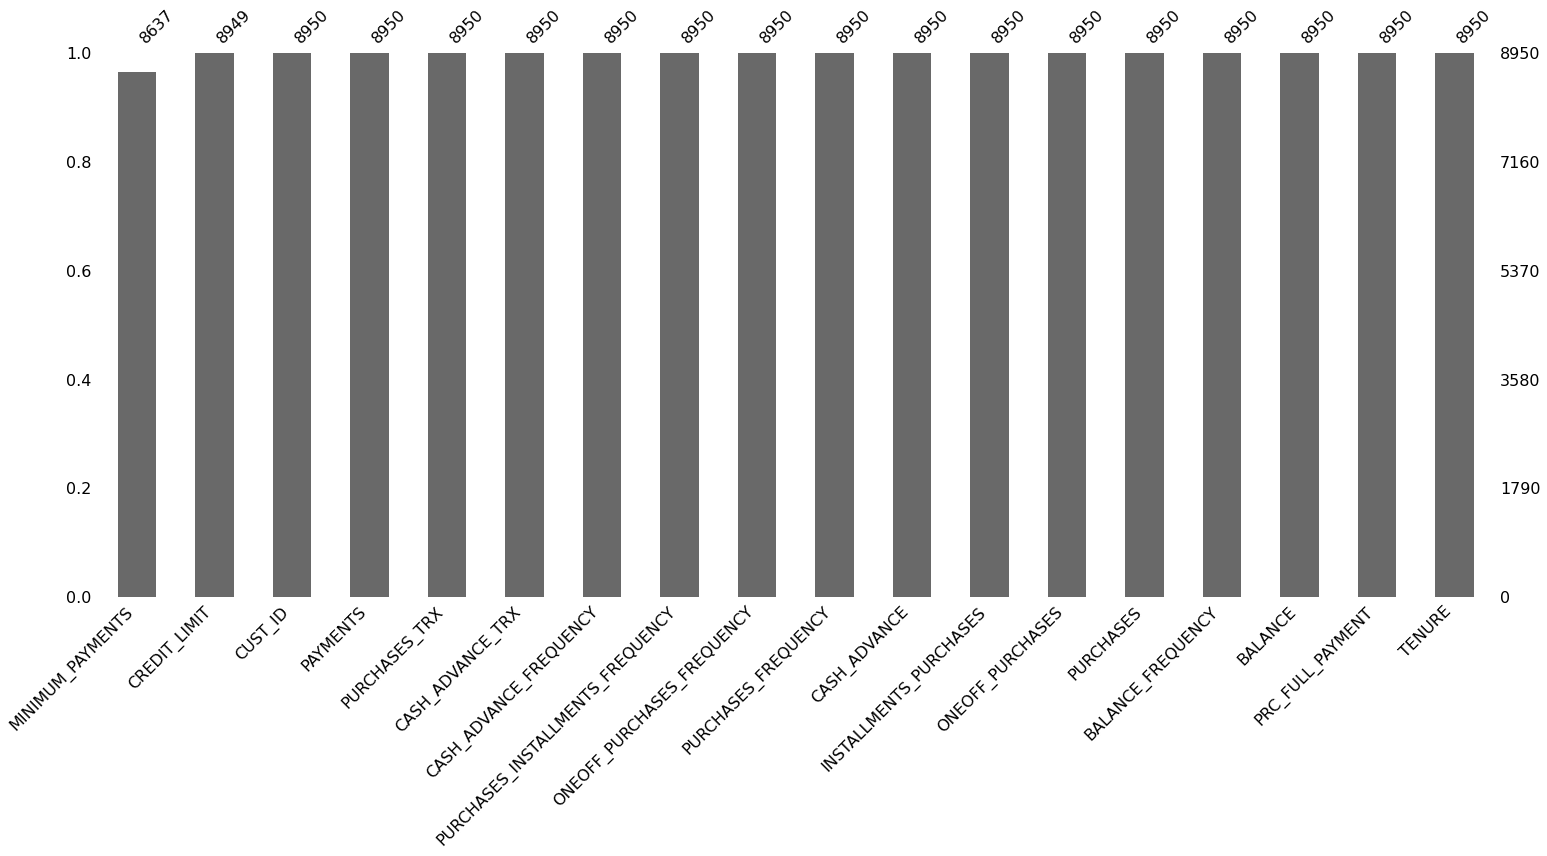

In [7]:
msno.bar(df, sort='ascending')

In [8]:
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [9]:
df[df['MINIMUM_PAYMENTS'].isna()]


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [10]:
df[df['CREDIT_LIMIT'].isna()]


CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

Missing Value ada pada MINIMUM_PAYMENTS sebesar 3.49% dan CREDIT_LIMIT sebesar 0.01%

#    v. Data Preprocessing
      > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.
   

In [11]:
#Menghapus kolom ID
df.drop(['CUST_ID'], axis=1, inplace=True)

In [12]:
#setelah melihat distribusi data missing value pada CREDIT_LIMIT ada missing value sebesar 0.01% dan MINIMUM_PAYMENTS sebesar 3.49% maka saya memutuskan untuk  menghapusnya saja
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)


In [13]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [14]:
#mengambil data inference 
df_inf = df.sample(10, random_state=random_state) #diambil sebanyak 10 sample
df_train = df.drop(df_inf.index)
#reset index dari data yang di ambil
df_train = df_train.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)


Karena kita akan melakukan clustering maka data hanya dipecah menjadi INF dan Data Training, pemecahan di lakukan duluan karena di takutkan adanya kebocoran data saat melakukan imputasi missing value pada  `Minimum Payment`, dan data tersebut berdistribusi skeww maka akan di isi dengan median

In [15]:
df_inf['MINIMUM_PAYMENTS'].fillna(df_inf['MINIMUM_PAYMENTS'].median(), inplace=True)

df_train['MINIMUM_PAYMENTS'].fillna(df_train['MINIMUM_PAYMENTS'].median(), inplace=True)

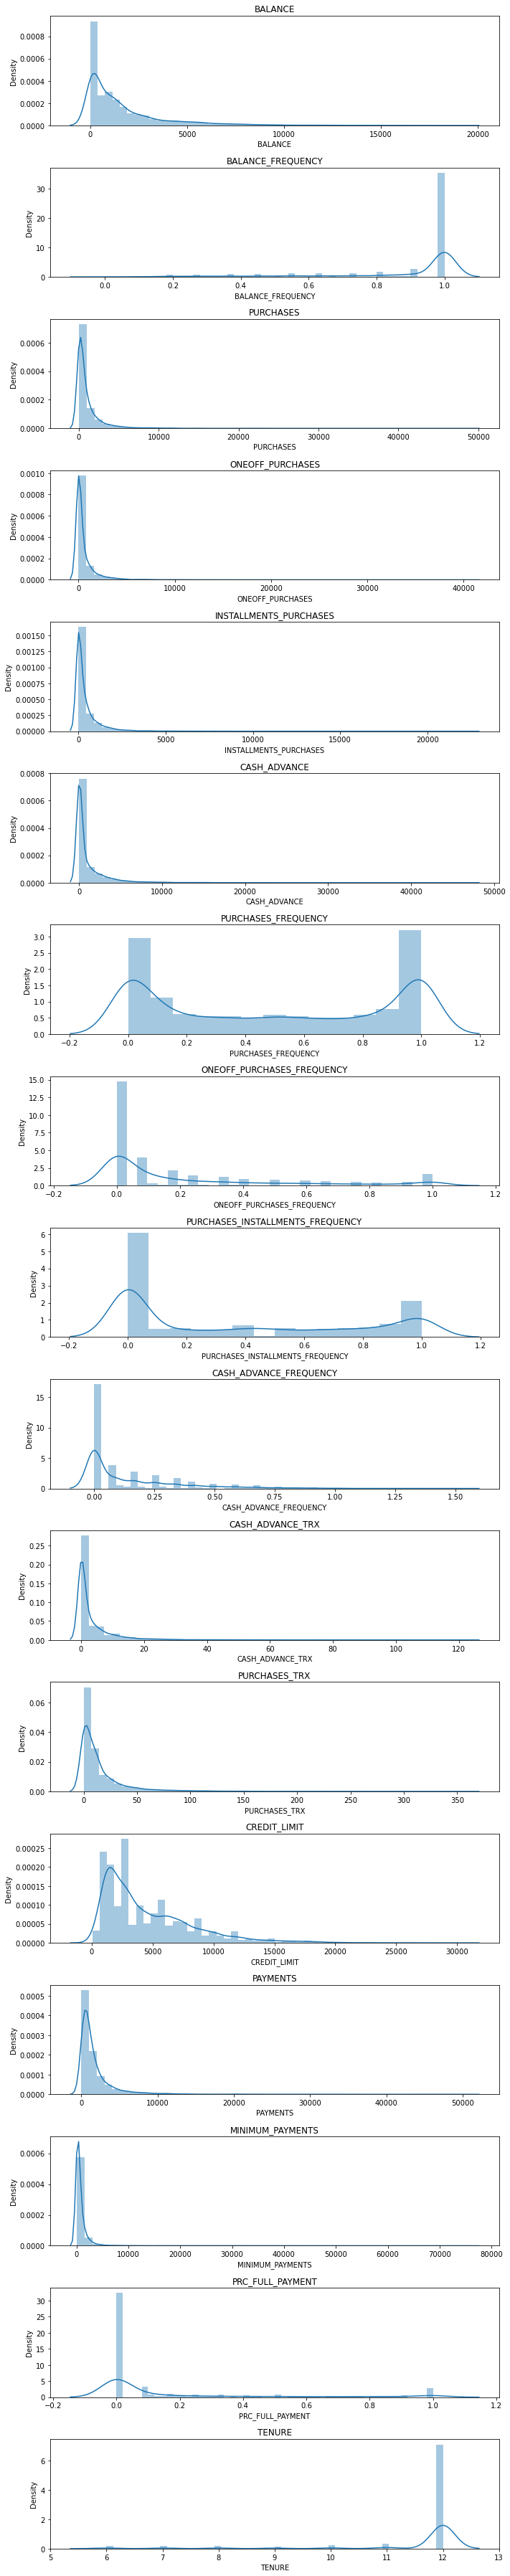

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(df_train.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(df_train[df_train.columns[i]], kde = True)
  plt.title(df_train.columns[i])
plt.tight_layout();

Data yang kita miliki memiliki distribusi skeww yang sangat parah, tetapi setelah di telaah kembali saya mengasumsikan hal ini sangat wajar terjadi apalagi pada kasus transaksi jadi saya tidak akan melakukan handling Outlier

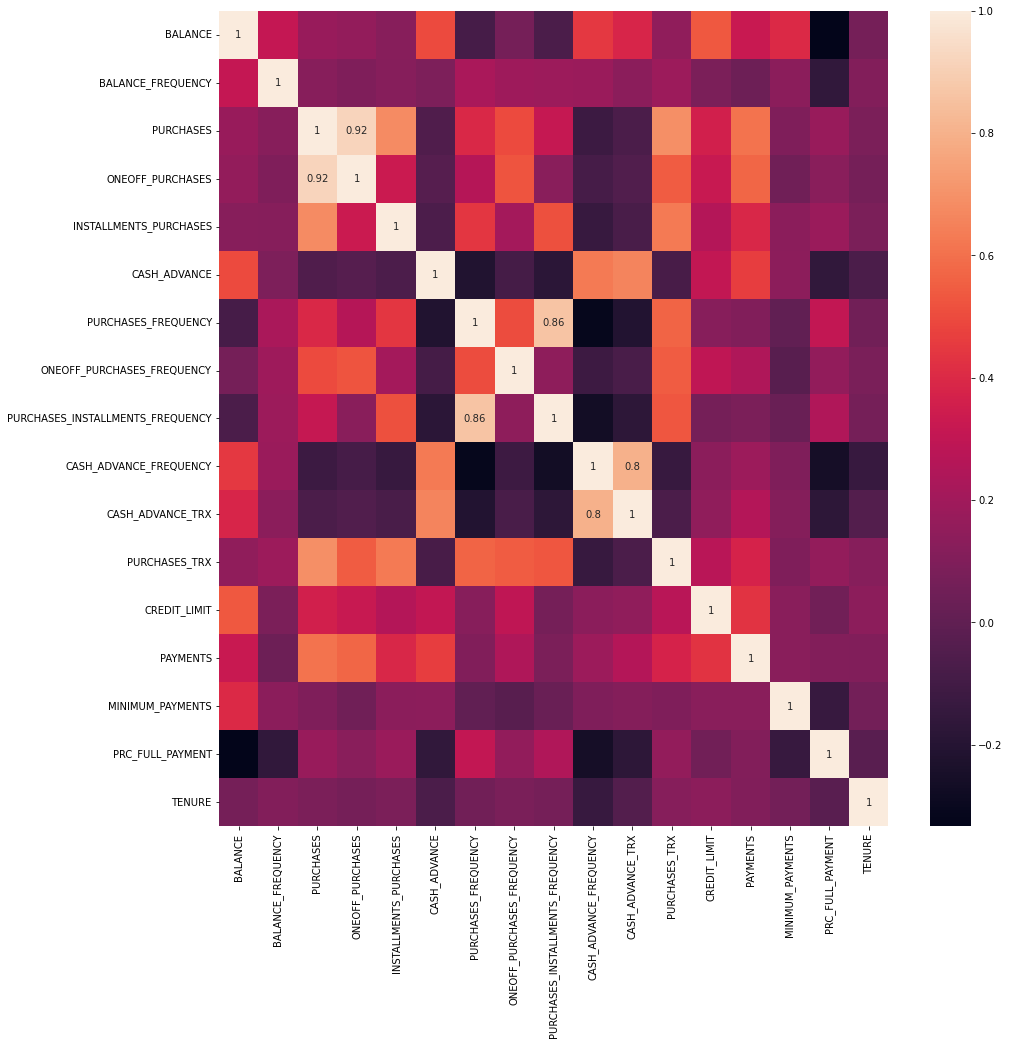

In [17]:
#melihat korelasi antar feature
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_train.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

>Pada tabel corelation kita bisa melihat bahwa:

- ONEOFF_PURCHASES sangat berkorelasi dengan PURCHASES 0.92
- PURCHASES_INSTALLMENTS_FREQUENCY  sangat berkorelasi dengan PURCHASES-FREQUENCY 0.86
- CASH_ADVANCE_TRX sangat berkorelasi dengan CASH_ADVANCE_FREQUENCY 0.8

> Penjelasan: 

- `ONEOFF_PURCHASES` : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
- `PURCHASES` : Jumlah pembelian yang dilakukan dari akun
- `PURCHASES_INSTALLMENTS_FREQUENCY` : Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
- `PURCHASES_FREQUENCY` : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- `CASH_ADVANCE_TRX` : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- `CASH_ADVANCE_FREQUENCY` : Seberapa sering pembayaran tunai di muka

> Maka kita akan melakukan PCA untuk mereduksi features yang ada karena mereka memiliki korelasi yang sangat besar

In [18]:
df_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8621     5.871712           0.500000      20.90             20.90   
8622    28.493517           1.000000     291.12              0.00   
8623    23.398673           0.833333     144.40              0.00   
8624    13.457564           0.833333       0.00              0.00   
8625   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8621                    0.00      0.000000             0.166667   
8622                  291.12      0.000000             1.000000   
8623                  144.40      0.000000             0.833333   
8624                    0.00     36.558778             0.000000   
8625                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8621                    0.166667                          0.000000   
8622                    0.000000                          0.833333   
8623                    0.000000                          0.666667   
8624                    0.000000                          0.000000   
8625                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8621                0.000000                 0              1         500.0   
8622                0.000000                 0              6        1000.0   
8623                0.000000                 0              5        1000.0   
8624                0.166667                 2              0         500.0   
8625                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8621    58.644883         43.473717          0.000000       6  
8622   325.594462         48.886365          0.500000       6  
8623    81

In [19]:
df_train.shape

(8626, 17)

In [20]:
df_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1589.141901           1.000000       0.00              0.00   
1  1262.888170           1.000000     313.02            210.50   
2  1632.421395           1.000000     993.96            245.59   
3  1478.552756           1.000000     479.10            311.10   
4    31.870629           0.818182     192.92            139.70   
5   251.715214           0.909091    2722.34           1744.63   
6   820.700166           0.818182       0.00              0.00   
7  3798.323722           1.000000       0.00              0.00   
8  2146.005518           0.909091     469.83            469.83   
9  1682.088431           1.000000    2263.38            837.61   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1387.078370             0.000000   
1                  102.52   1381.613303             0.583333   
2                  748.37      0.000000             0.727273   
3                  168.00    901.677781             0.500000   
4                   53.22      0.000000             0.166667   
5                  977.71      0.000000             0.750000   
6                    0.00    857.720875             0.000000   
7                    0.00    182.513182             0.000000   
8                    0.00      0.000000             0.818182   
9                 1425.77    784.026600             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.500000                          0.416667   
2                    0.181818                          0.636364   
3                    0.416667                          0.500000   
4                    0.083333                          0.083333   
5                    0.750000                          0.583333   
6                    0.000000                          0.000000   
7                    0.000000                          0.000000   
8                    0.818182                          0.000000   
9                    0.500000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.250000                10              0        3000.0   
1                0.083333                 1             13        1500.0   
2                0.000000                 0             22        6000.0   
3                0.083333                 1             11        4500.0   
4                0.000000                 0              2        5500.0   
5                0.000000                 0             32        1200.0   
6                0.083333                 2              0        1500.0   
7                0.166667                 2              0        4000.0   
8                0.000000                 0             10        8500.0   
9                0.166667                 3             69        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   454.856663        557.016549          0.000000      12  
1  1960.519301        922.418051          0.000000      12  
2  2752.623744        489.842903          0.090909      11  
3  4774.597215        478.802097          0.000000      12  
4   834.627595         92.360868          0.090909      12  
5  2165.330989        167.725809          0.777778      12  
6  1892.507498        267.650667          0.111111      12  
7   916.384302       1193.658503          0.000000      12  
8  1025.916057        477.907704          0.000000      11  
9  2411.309817        443.907546          0.000000      12

In [21]:
df_inf.shape

(10, 17)

In [22]:
#Scaling data yang ada menggunakan standard scaler dan normalisasi data
scale = StandardScaler()
pt = PowerTransformer()
df_train_sc = scale.fit_transform(df_train)
df_train_sc = pt.fit_transform(df_train_sc)


df_inf_sc = scale.fit_transform(df_inf)
df_inf_sc = pt.fit_transform(df_inf_sc)


In [23]:
df_train_sc.shape

(8626, 17)

In [24]:
df_inf_sc.shape

(10, 17)

In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_train.values, i) for i in range(len(df_train.columns))]

vif_data

feature           VIF
0                            BALANCE      4.161556
1                  BALANCE_FREQUENCY     23.056319
2                          PURCHASES  58493.264846
3                   ONEOFF_PURCHASES  32607.586700
4             INSTALLMENTS_PURCHASES  10353.056067
5                       CASH_ADVANCE      3.539328
6                PURCHASES_FREQUENCY     26.544055
7         ONEOFF_PURCHASES_FREQUENCY      5.691673
8   PURCHASES_INSTALLMENTS_FREQUENCY     17.225066
9             CASH_ADVANCE_FREQUENCY      4.965974
10                  CASH_ADVANCE_TRX      3.895009
11                     PURCHASES_TRX      4.241075
12                      CREDIT_LIMIT      4.697360
13                          PAYMENTS      3.782487
14                  MINIMUM_PAYMENTS      1.410101
15                  PRC_FULL_PAYMENT      1.737504
16                            TENURE     20.618627

saya mengasumsikan tracehold untuk vid adalah 5, jadi feature yang lebih dari 5 ada 8, dan yang di bawah 5 ada 9 maka saya memutuskan untuk pca bisa di kurangi menjadi 10 features

In [26]:
var_ratio={}
for i in range(2,18):
    pc=PCA(n_components=i)
    cr_pca=pc.fit(df_train_sc)
    var_ratio[i]=sum(cr_pca.explained_variance_ratio_)
var_ratio

{2: 0.5804504757059565,
 3: 0.676937033540409,
 4: 0.7599824524152055,
 5: 0.8249202252290805,
 6: 0.8728835478685464,
 7: 0.9074438060891353,
 8: 0.9378051669408765,
 9: 0.9574413783676358,
 10: 0.9704014032216202,
 11: 0.97810136035622,
 12: 0.9843499922444222,
 13: 0.9895550145607866,
 14: 0.9940073727590971,
 15: 0.9973619743520489,
 16: 0.9990274526125388,
 17: 0.9999999999999999}

namun setelah melihat dari var ratio yang ada pada dataset kita akan menggunakan 7 componen features (90%) dengan data PCA

In [27]:
pc=PCA(n_components=7)
p=pc.fit(df_train_sc)

<AxesSubplot:>

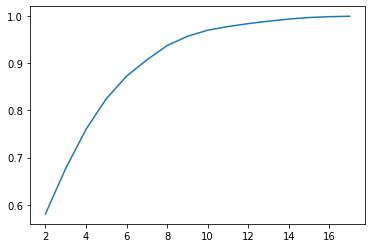

In [28]:
pd.Series(var_ratio).plot()

Visualisasi grafik data yang kita miliki jika componenya 7 maka kita menggunakan 90% data, maka akan di lakukan PCA

In [29]:
pca_7 = PCA(n_components=7).fit(df_train_sc)
pca_7_trans = pca_7.fit_transform(df_train_sc)
pca_7_trans.shape

(8626, 7)

In [30]:
pca_7_trans.shape

(8626, 7)

In [31]:
df_inf_sc.shape

(10, 17)

In [32]:
pd.DataFrame(df_inf_sc)

0         1         2         3         4         5         6   \
0  0.256370  0.803527 -1.143173 -1.208980 -0.895672  1.409583 -1.225350   
1 -0.088747  0.803527 -0.242424 -0.088863 -0.274096  1.402655  0.300016   
2  0.299134  0.803527  0.845800  0.055138  1.280928 -1.043959  0.730320   
3  0.144042  0.803527  0.124152  0.293840  0.049574  0.741092  0.060638   
4 -1.702247 -1.485988 -0.554434 -0.415315 -0.554794 -1.043959 -0.818636   
5 -1.383592 -0.924594  1.636731  1.797981  1.444576 -1.043959  0.799977   
6 -0.617390 -1.485988 -1.143173 -1.208980 -0.895672  0.673923 -1.225350   
7  1.978644  0.803527 -1.143173 -1.208980 -0.895672 -0.609457 -1.225350   
8  0.766341 -0.924594  0.105602  0.723601 -0.895672 -1.043959  1.011481   
9  0.347447  0.803527  1.514090  1.260557  1.636498  0.558040  1.592255   

         7         8         9         10        11        12        13  \
0 -1.157655 -1.027082  1.669679  1.871000 -1.137253 -0.359108 -1.590050   
1  0.683999  0.491250  0.212129  0.001137  0.297911 -1.213883  0.272249   
2 -0.388393  1.007961 -1.102609 -1.062767  0.825846  0.960807  0.865232   
3  0.436501  0.702293  0.212129  0.001137  0.133612  0.362886  1.875899   
4 -0.792840 -0.659306 -1.102609 -1.062767 -0.857491  0.771286 -1.028715   
5  1.342901  0.894039 -1.102609 -1.062767  1.175343 -1.397897  0.445481   
6 -1.157655 -1.027082  0.212129  0.665561 -1.137253 -1.213883  0.210514   
7 -1.157655 -1.027082  1.052185  0.665561 -1.137253  0.139157 -0.915497   
8  1.506798 -1.027082 -1.102609 -1.062767  0.044148  1.811478 -0.768168   
9  0.683999  1.672092  1.052185  1.046673  1.792392  0.139157  0.633054   

         14        15   16  
0  0.368742 -0.776400  0.5  
1  1.268330 -0.776400  0.5  
2  0.147746  0.821700 -2.0  
3  0.108722 -0.776400  0.5  
4 -1.690189  0.821700  0.5  
5 -1.278582  2.001321  0.5  
6 -0.776031  1.013681  0.5  
7  1.765350 -0.776400  0.5  
8  0.105527 -0.776400 -2.0  
9 -0.019616 -0.776400  0.5

In [33]:
pca_7_inf = PCA(n_components=7).fit(df_inf_sc)
pca_7_trans_inf = pca_7_inf.fit_transform(df_inf_sc)
pca_7_trans_inf.shape


(10, 7)

In [34]:
#masukan PCA ke dalam dataframe
df1=pd.DataFrame(pca_7_trans)
df1

0         1         2         3         4         5         6
0    -1.087765 -3.301374  0.097516 -0.769270 -0.127438  0.119504  1.274232
1    -3.170450  1.527219  0.420547  1.686224 -2.042285  0.580899 -0.336693
2     1.294374  0.972866  1.656837 -2.286940  0.293755  0.402024 -0.447544
3    -1.390917 -1.895368  0.285267 -1.913096 -0.237653 -0.432318 -0.363018
4     1.163223  0.444883 -2.269572 -1.360074 -0.320537  0.926815  0.265848
...        ...       ...       ...       ...       ...       ...       ...
8621 -1.367784 -3.793319  1.290573 -0.055880  2.338998  0.970490  0.300531
8622  1.184436 -3.025780 -1.574508  1.167544  1.639918  0.062516 -2.091978
8623  0.429514 -3.726107 -0.786899  1.437522  1.717162  0.892476 -0.714013
8624 -2.391152 -3.502476  0.599625  1.658897  1.717389 -0.063235 -0.751609
8625  0.243393 -0.872185  2.294435  0.789874  3.851928 -0.291469  0.996232

[8626 rows x 7 columns]

In [35]:
col_list = df.columns
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [36]:
pd.DataFrame(pca_7.components_.T, columns=['F_'+str(i) for i in range(7)], index=col_list)


F_0       F_1       F_2       F_3  \
BALANCE                          -0.127555  0.417657 -0.096748 -0.210230   
BALANCE_FREQUENCY                 0.029832  0.247023 -0.263746 -0.387665   
PURCHASES                         0.352334  0.190562  0.125629  0.043847   
ONEOFF_PURCHASES                  0.247593  0.215734  0.461058 -0.083091   
INSTALLMENTS_PURCHASES            0.321894  0.086827 -0.353024  0.173209   
CASH_ADVANCE                     -0.250818  0.297231 -0.041214  0.336174   
PURCHASES_FREQUENCY               0.363545  0.067046 -0.221227  0.069878   
ONEOFF_PURCHASES_FREQUENCY        0.241204  0.195300  0.449039 -0.109510   
PURCHASES_INSTALLMENTS_FREQUENCY  0.314188  0.026795 -0.451099  0.138505   
CASH_ADVANCE_FREQUENCY           -0.274672  0.279132 -0.057405  0.275821   
CASH_ADVANCE_TRX                 -0.265160  0.290347 -0.065198  0.288728   
PURCHASES_TRX                     0.370937  0.150379 -0.089100  0.037915   
CREDIT_LIMIT                      0.067727  0.274642  0.181166  0.087836   
PAYMENTS                          0.093013  0.327961  0.147898  0.264465   
MINIMUM_PAYMENTS                 -0.098085  0.379217 -0.182589 -0.228267   
PRC_FULL_PAYMENT                  0.173519 -0.158737  0.080244  0.483469   
TENURE                            0.074152  0.075021 -0.048688 -0.305346   

                                       F_4       F_5       F_6  
BALANCE                           0.021004  0.249856 -0.058229  
BALANCE_FREQUENCY                 0.033359 -0.392487 -0.659594  
PURCHASES                         0.088532  0.000608  0.099174  
ONEOFF_PURCHASES                  0.181043 -0.111229  0.057548  
INSTALLMENTS_PURCHASES           -0.018239  0.105384  0.156116  
CASH_ADVANCE                      0.037037 -0.105601  0.099219  
PURCHASES_FREQUENCY               0.149592 -0.063410 -0.013547  
ONEOFF_PURCHASES_FREQUENCY        0.226038 -0.184777  0.014982  
PURCHASES_INSTALLMENTS_FREQUENCY  0.054537  0.051488  0.106020  
CASH_ADVANCE_FREQUENCY            0.142563 -0.268895  0.093527  
CASH_ADVANCE_TRX                  0.116315 -0.274838  0.118078  
PURCHASES_TRX                     0.116907 -0.078896  0.098535  
CREDIT_LIMIT                     -0.392666  0.487942 -0.172868  
PAYMENTS                         -0.330589  0.053200 -0.072800  
MINIMUM_PAYMENTS                 -0.023514  0.251313 -0.021334  
PRC_FULL_PAYMENT                 -0.301492 -0.201372 -0.509786  
TENURE                           -0.690822 -0.457592  0.417869

Nilai EVR dari masing-masing komponen PCA 7 adalah:

In [37]:
pd.Series(pca_7.explained_variance_ratio_,index=['F_'+str(i) for i in range(7)])

F_0    0.343015
F_1    0.237435
F_2    0.096487
F_3    0.083045
F_4    0.064938
F_5    0.047963
F_6    0.034560
dtype: float64

#    vi. Model Definition 
      > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


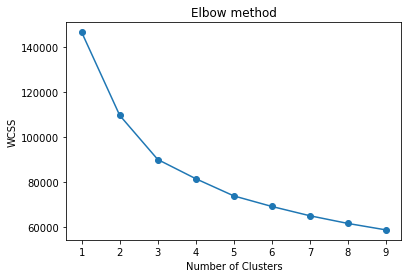

In [38]:
# KMEANS

kmeans_mod = [KMeans(n_clusters=k, random_state=random_state).fit(df_train_sc) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_mod]

plt.plot(range(1, 10), innertia, '-o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow yang di lihat ada di  4 maka kmean yang di gunakan adalah k=4 

In [39]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.25754303019817826
For n_clusters = 3 The average silhouette_score is : 0.25201644612170176
For n_clusters = 4 The average silhouette_score is : 0.2232137850814724
For n_clusters = 5 The average silhouette_score is : 0.23120893835300838
For n_clusters = 6 The average silhouette_score is : 0.21610176451137197
For n_clusters = 7 The average silhouette_score is : 0.21634375766324063
For n_clusters = 8 The average silhouette_score is : 0.2265742059303127


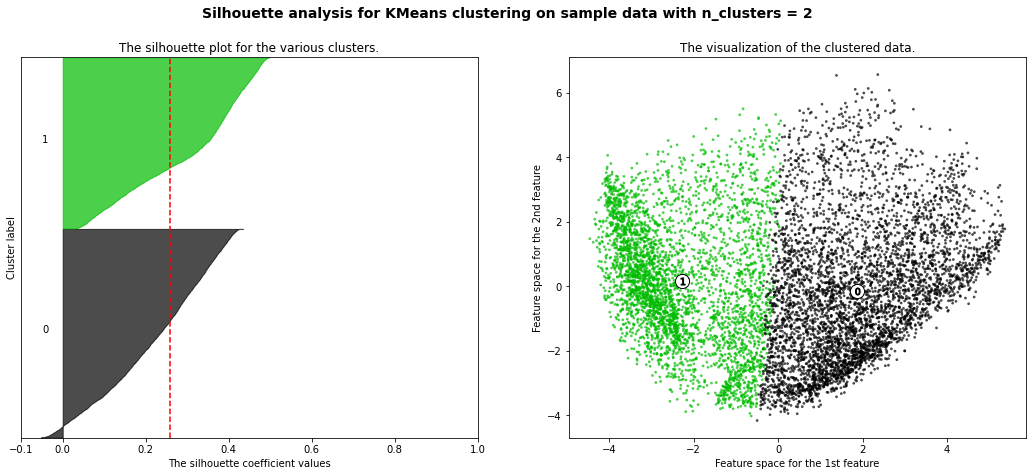

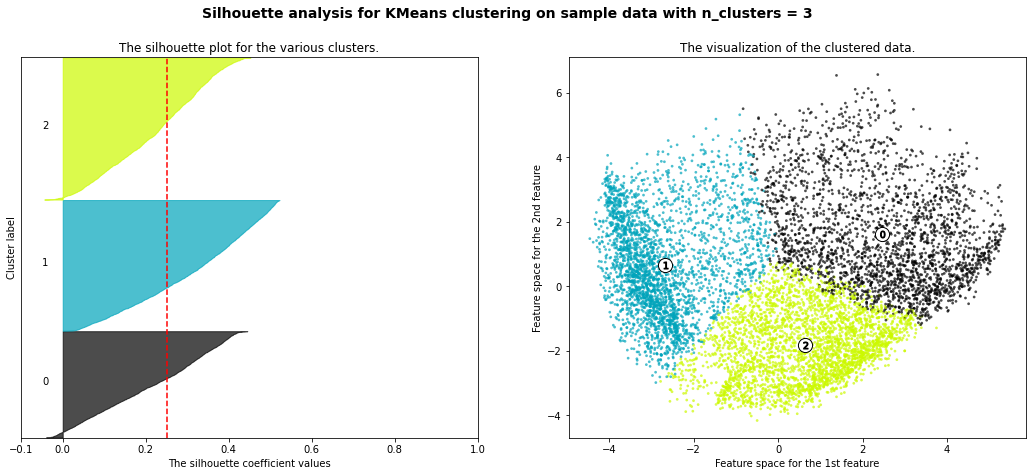

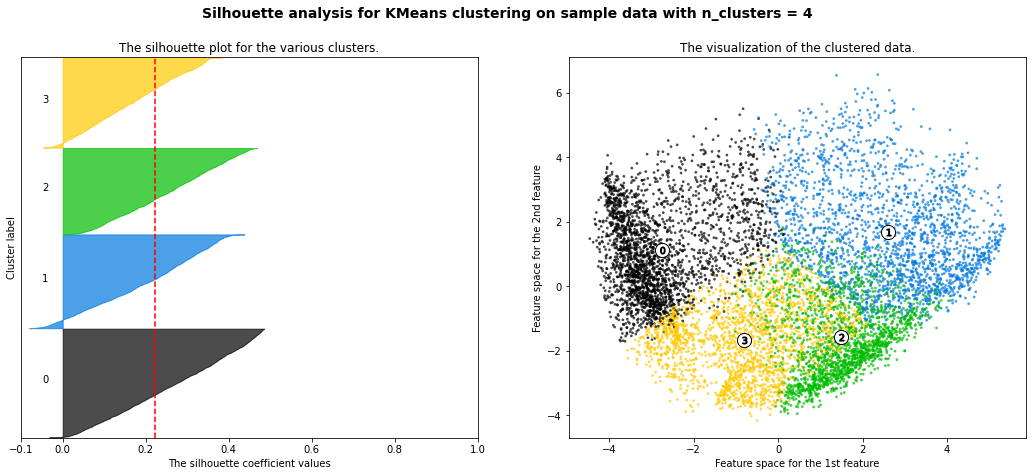

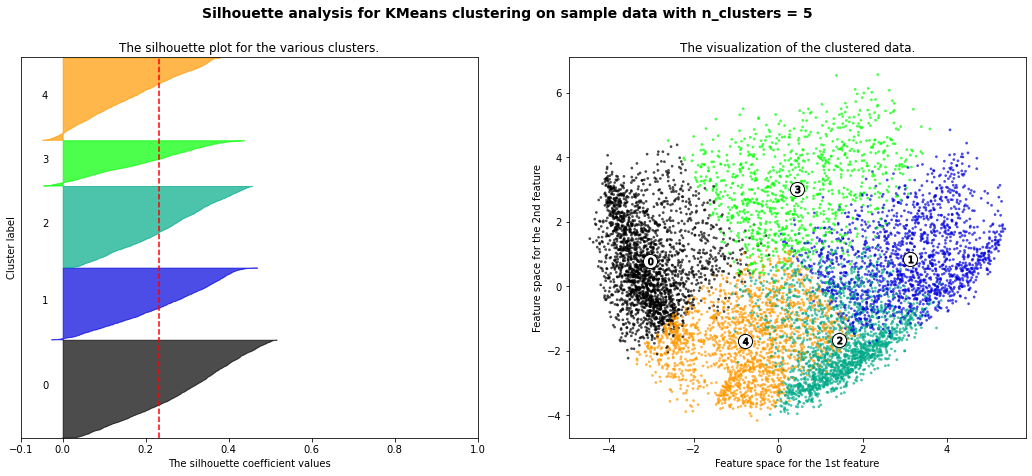

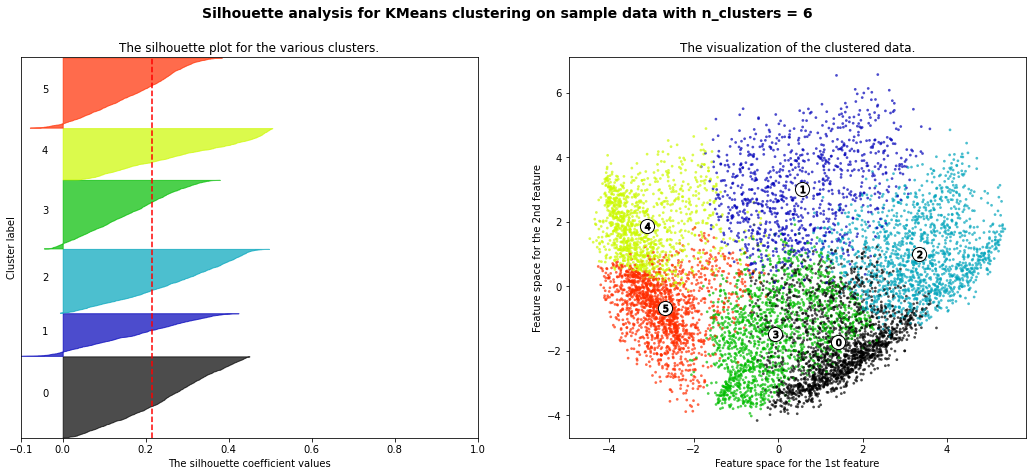

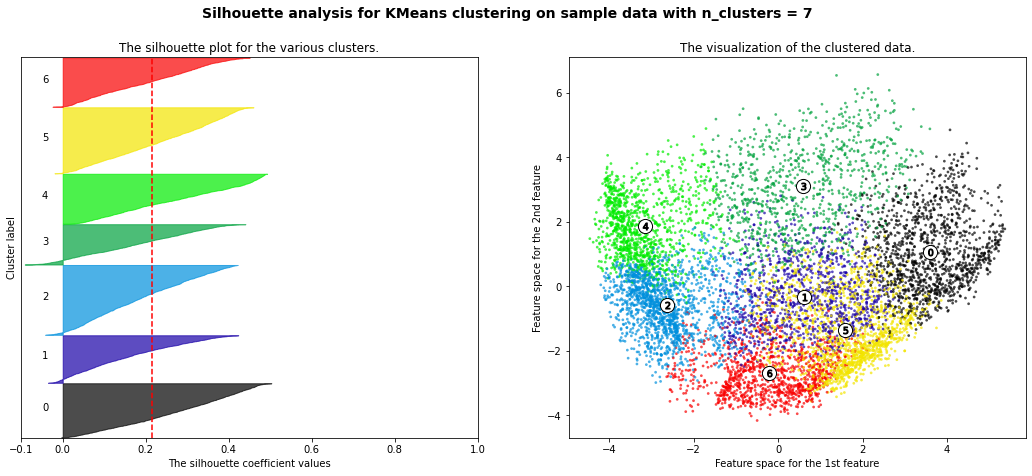

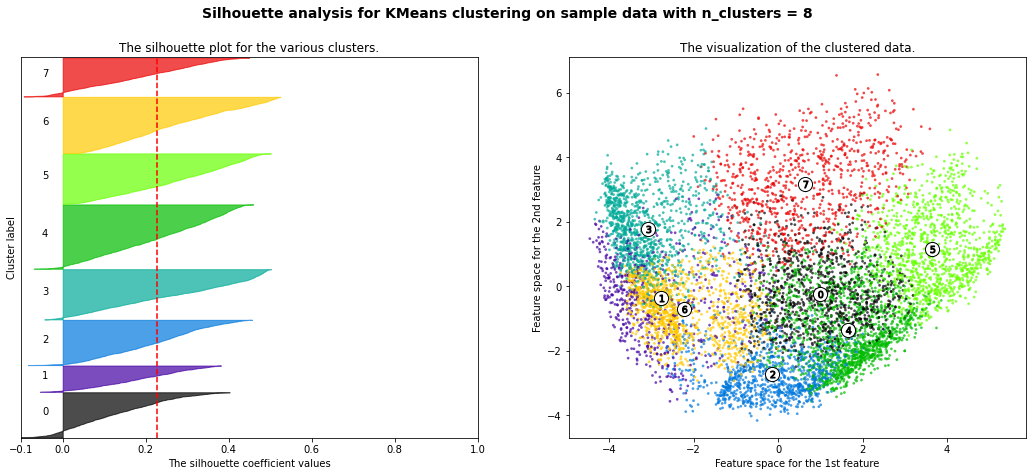

In [40]:
K=[2,3,4,5,6,7,8]
plot_silhouette(K,pca_7_trans)

dari hasil silhouette plot yang terbesar ada di k=2
For n_clusters = 2 The average silhouette_score is : 0.2575626780506765

In [41]:
#Kmeans
km = KMeans(n_clusters = 2,init ='k-means++', max_iter=300,random_state=random_state)

In [42]:
#DBSCAN
dbscan = DBSCAN(eps=2,min_samples=4)

In [43]:
#Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

#    vii. Model Training
      > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [44]:
#Training kmeans
km.fit(pca_7_trans)
y_pred_km = km.predict(pca_7_trans)
y_pred_km


array([1, 1, 0, ..., 0, 1, 0])

In [45]:
#Training Agglomerative Clustering
agg.fit(pca_7_trans)
y_pred_agg = agg.labels_
y_pred_agg

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [46]:
#Training dbscan
dbscan.fit(pca_7_trans)
y_pred_db = dbscan.labels_
y_pred_db

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [47]:
df_all_cls = pd.DataFrame(df_train,columns = df.columns)
df_all_cls['clusters_kmeans'] = y_pred_km
df_all_cls['clusters_dbscan'] = y_pred_db
df_all_cls['clusters_agg'] = y_pred_agg

df_all_cls.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3   817.714335           1.000000      16.00             16.00   
4  1809.828751           1.000000    1333.28              0.00   
5   627.260806           1.000000    7091.01           6402.63   
6  1823.652743           1.000000     436.20              0.00   
7  1014.926473           1.000000     861.49            661.49   
8   152.225975           0.545455    1281.60           1281.60   
9  1293.124939           1.000000     920.12              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00      0.000000             0.083333   
4                 1333.28      0.000000             0.666667   
5                  688.38      0.000000             1.000000   
6                  436.20      0.000000             1.000000   
7                  200.00      0.000000             0.333333   
8                    0.00      0.000000             0.166667   
9                  920.12      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   
5                    1.000000                          1.000000   
6                    0.000000                          1.000000   
7                    0.083333                          0.250000   
8                    0.166667                          0.000000   
9                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.00                 0              1        1200.0   
4                    0.00                 0              8        1800.0   
5                    0.00                 0             64       13500.0   
6                    0.00                 0             12        2300.0   
7                    0.00                 0              5        7000.0   
8                    0.00                 0              3       11000.0   
9                    0.00                 0             12        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  clusters_kmeans  \
0   201.802084        139.509787          0.000000      12                1   
1  4103.032597       1072.340217          0.222222      12                1   
2   622.066742        627.284787          0.000000      12                0   
3   678.334763        244.791237          0.000000      12                1   
4  1400.057770       2407.246035          0.000000      12                0   
5  6354.314328        198.065894          1.000000      12                0   
6   679.065082        532.033990          0.000000      12                0   
7   688.278568        311.963409          0.000000      12                0   
8  1164.770591        100.302262          0.000000      12                0   
9  1083.301007       2172.697765          0.000000      12                0   

   clusters_dbscan  clusters_agg  
0                0             0  
1                0             1  
2                0       

## EDA K-Means Clusters

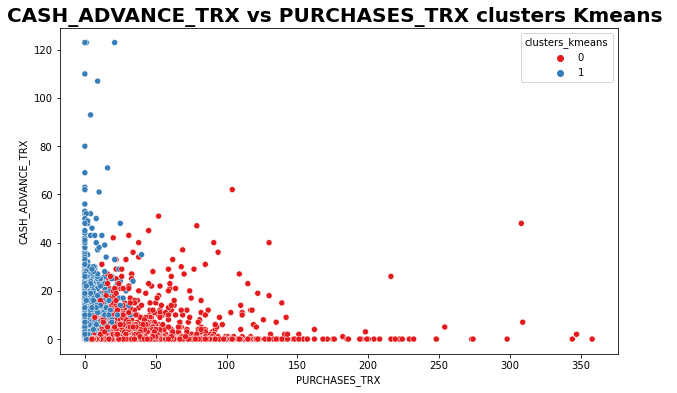

In [87]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'PURCHASES_TRX', y = 'CASH_ADVANCE_TRX', hue = 'clusters_kmeans', data = df_all_cls, palette = 'Set1')
plt.title('CASH_ADVANCE_TRX vs PURCHASES_TRX clusters Kmeans ',fontweight="bold", size=20)

plt.show()

Pada kedua clusters ini terdapat perbedaan yang sangat signifikan di 
Jumlah Transaksi yang dilakukan dengan "Cash in Advanced" dan Jumlah transaksi pembelian yang dilakukan
dilihat kembali behaviornya

- cluster 0 = sering berbelanja namun dengan nominal tidak besar
- cluster 1 = jarang belanja namun ketika belanja menggunakan nominal uang yang besar

In [75]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_train_sc)
pca_df = pd.DataFrame(pca_data,columns=['F_0','F_1'])
pca_df['Cluster']= y_pred_km + 1

In [76]:
fig = px.scatter(pca_df, x="F_0", y="F_1", color="Cluster", hover_name="Cluster")
fig.show()

## EDA Agglomerative Clusters

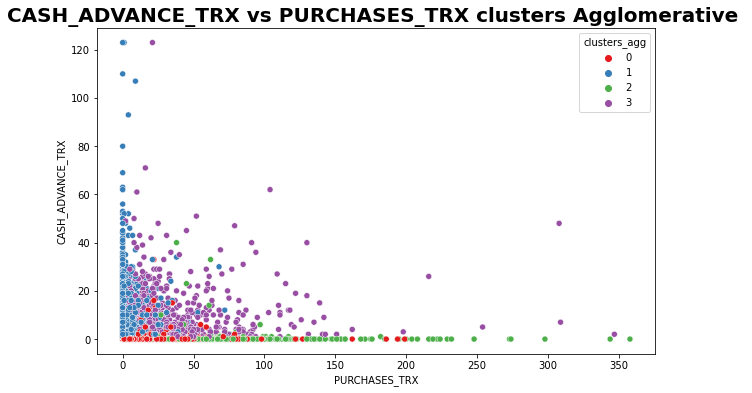

In [88]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'PURCHASES_TRX', y = 'CASH_ADVANCE_TRX', hue = 'clusters_agg', data = df_all_cls, palette = 'Set1')
plt.title('CASH_ADVANCE_TRX vs PURCHASES_TRX clusters Agglomerative ',fontweight="bold", size=20)

plt.show()

pada pembagian ke 4 cluster ini di dapatkan
- cluster0 = orang yang jarang belanja dan uang yang di belanjakan tidak banyak
- cluster1 = orang yang belanjanya jarang namun jumlah transaksinya besar
- cluster2 = orang yang sering belanja namun nominal sangat kecil
- cluster3 = sedikit tidak sering dari cluster 2 namun nominal belanja lebih besar dari cluster 2


Perbandingan antara pembelian dan saldo yang di miliki pada Agglomerative cluster

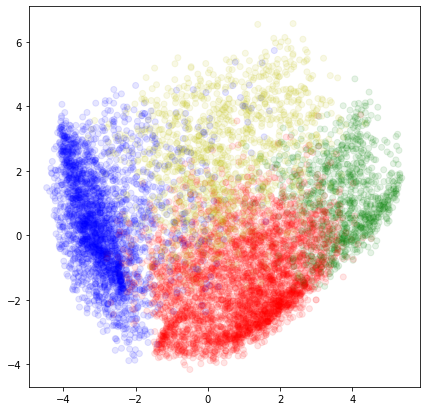

In [78]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'c',5:'m',6:'k',7:'w',8:'r',9:'b',10:'g',11:'y',12:'c',13:'m',14:'k',15:'w'}
label_color=[color_map[l] for l in agg.labels_]
plt.figure(figsize=(7,7))
plt.scatter(pca_7_trans[:,0],pca_7_trans[:,1],c=label_color,cmap='Spectral',alpha=0.1)

##  EDA DBSCAN Clusters

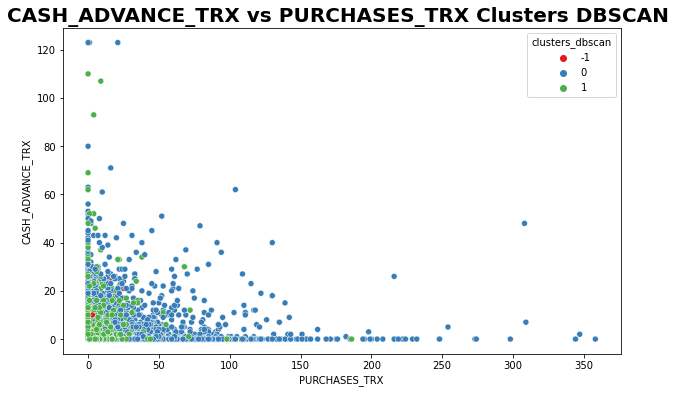

In [89]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'PURCHASES_TRX', y = 'CASH_ADVANCE_TRX', hue = 'clusters_dbscan', data = df_all_cls, palette = 'Set1')
plt.title('CASH_ADVANCE_TRX vs PURCHASES_TRX Clusters DBSCAN ',fontweight="bold", size=20)

plt.show()

penyebaran datanya agak sulit di ambil kesimpulan

In [80]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(df_train_sc)

DBSCAN(eps=0.2)

In [81]:
def plot_dbscan(dbscan, df_scaled, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = df_scaled[anomalies_mask]
    non_cores = df_scaled[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

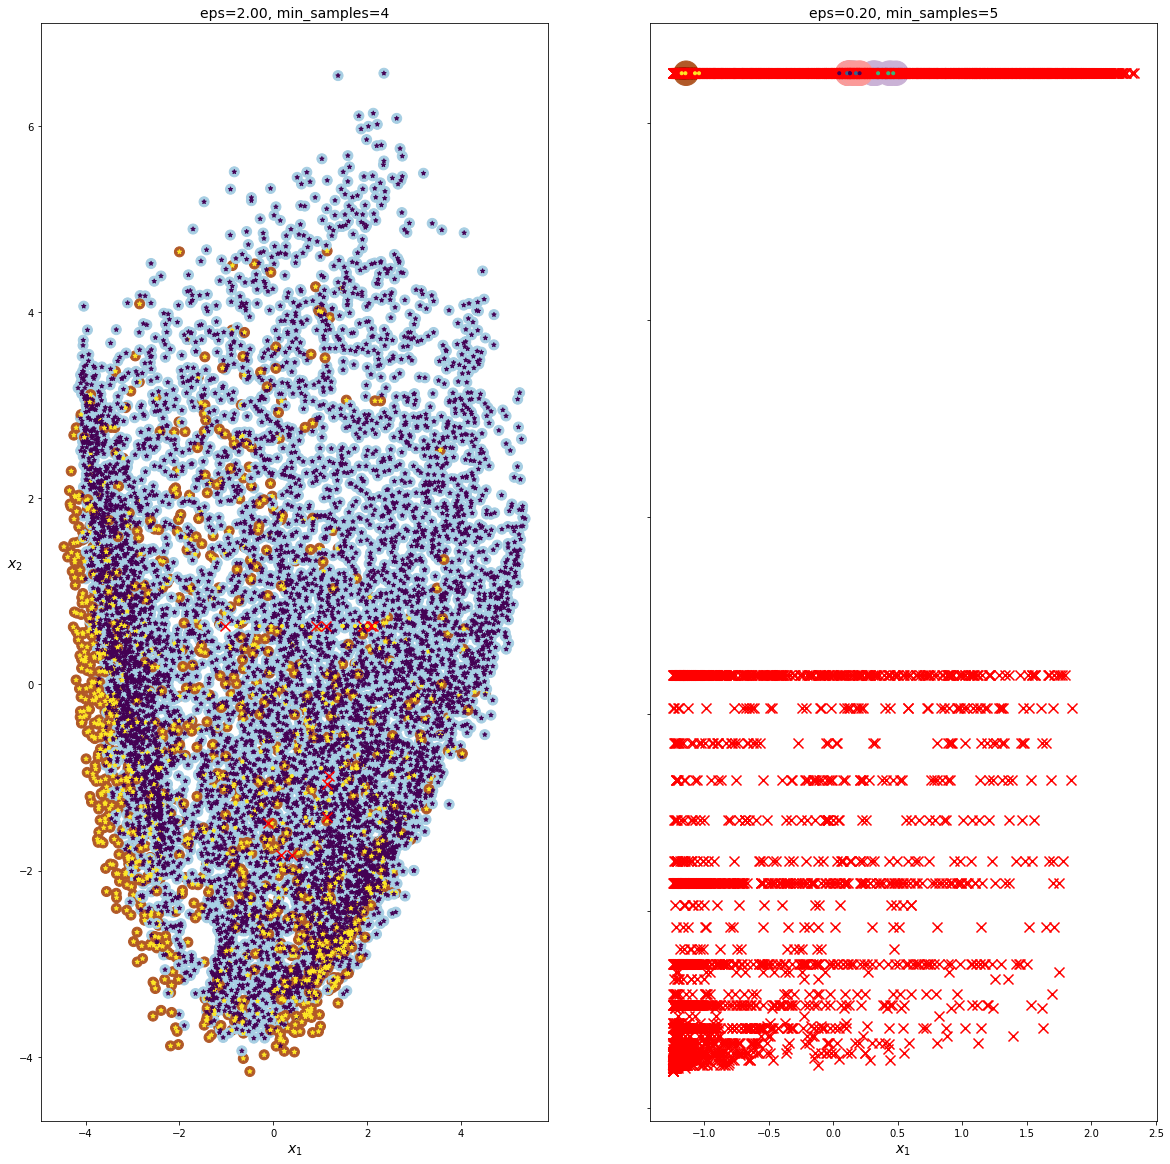

In [82]:
plt.figure(figsize=(20, 20.2))

plt.subplot(121)
plot_dbscan(dbscan, df_train_sc, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, df_train_sc, size=600, show_ylabels=False)

plt.show()

Dari pesebaran data yang kita lihat eps=2, min_sampel=5 memiliki pesebaran yang lebih baik

# viii. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

dari ketiga model yang kita miliki bisa di simpulkan bahwa 

K-Means dengan cluster 2 yang mempunyai skor terbaik
- For n_clusters = 2 The average silhouette_score is : 0.2575626780506765

selanjutnya data infernce akan di berikan model kmean

#    ix. Model Inference
      > Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.
   

In [83]:
pca_7_inf = PCA(n_components=7).fit(df_inf_sc)

pca_7_trans_inf = pca_7_inf.fit_transform(df_inf_sc)

In [84]:
y_pred_inf = km.fit_predict(pca_7_trans_inf) + 1
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['cluster'])
y_pred_inf_df

cluster
0        2
1        1
2        1
3        1
4        2
5        1
6        2
7        2
8        1
9        1

In [85]:
pd_concat_inf = pd.concat([df_inf, y_pred_inf_df], axis=1)
pd_concat_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1589.141901           1.000000       0.00              0.00   
1  1262.888170           1.000000     313.02            210.50   
2  1632.421395           1.000000     993.96            245.59   
3  1478.552756           1.000000     479.10            311.10   
4    31.870629           0.818182     192.92            139.70   
5   251.715214           0.909091    2722.34           1744.63   
6   820.700166           0.818182       0.00              0.00   
7  3798.323722           1.000000       0.00              0.00   
8  2146.005518           0.909091     469.83            469.83   
9  1682.088431           1.000000    2263.38            837.61   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1387.078370             0.000000   
1                  102.52   1381.613303             0.583333   
2                  748.37      0.000000             0.727273   
3                  168.00    901.677781             0.500000   
4                   53.22      0.000000             0.166667   
5                  977.71      0.000000             0.750000   
6                    0.00    857.720875             0.000000   
7                    0.00    182.513182             0.000000   
8                    0.00      0.000000             0.818182   
9                 1425.77    784.026600             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.500000                          0.416667   
2                    0.181818                          0.636364   
3                    0.416667                          0.500000   
4                    0.083333                          0.083333   
5                    0.750000                          0.583333   
6                    0.000000                          0.000000   
7                    0.000000                          0.000000   
8                    0.818182                          0.000000   
9                    0.500000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.250000                10              0        3000.0   
1                0.083333                 1             13        1500.0   
2                0.000000                 0             22        6000.0   
3                0.083333                 1             11        4500.0   
4                0.000000                 0              2        5500.0   
5                0.000000                 0             32        1200.0   
6                0.083333                 2              0        1500.0   
7                0.166667                 2              0        4000.0   
8                0.000000                 0             10        8500.0   
9                0.166667                 3             69        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   454.856663        557.016549          0.000000      12        2  
1  1960.519301        922.418051          0.000000      12        1  
2  2752.623744        489.842903          0.090909      11        1  
3  4774.597215        478.802097          0.000000      12        1  
4   834.627595         92.360868          0.090909      12        2  
5  2165.330989        167.725809          0.777778      12        1  
6  1892.507498        267.650667          0.111111      12        2  
7   916.384302       1193.658503          0.000000      12        2  
8  1025.916057        477.907704          0.000000      11        1  
9  2411.309817        443.907546          0.000000      12        1

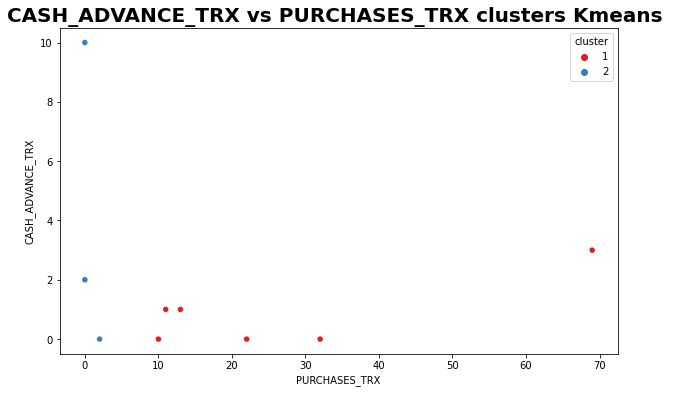

In [91]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'PURCHASES_TRX', y = 'CASH_ADVANCE_TRX', hue = 'cluster', data = pd_concat_inf, palette = 'Set1')
plt.title('CASH_ADVANCE_TRX vs PURCHASES_TRX clusters Kmeans ',fontweight="bold", size=20)

plt.show()

model bisa memvisualisasikan data inference sesuai dengan prediksi

#   x. Pengambilan Kesimpulan
       > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

- K-Means dengan cluster 2 yang bisa membedakan pelanggan dengan baik dimana

        - cluster 0 = sering berbelanja namun dengan nominal tidak besar
        - cluster 1 = jarang belanja namun ketika belanja menggunakan nominal uang yang besar


- Berikutnya perusahaan bisa mengambil langkah untuk memberikan program terbaik kepada pelanggan kita